In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
nd=pd.read_csv("99acres.csv")

## Carpet Area:
- Carpet area is the net usable area in the flat excluding the area coverd by the internal partition walls of the apartement.

## Built-Up Area:
- Built-up area is the carpet area,plus the space taken by the walls,it also includes usual area.

## Super built-up Area:
- Super built_up Area  of the property, along with the proportinate area of the common facilities in the house including lobby,liftshafts,the stairs,the swimming pool,the garden and club house etc

## Target variable:
- Here the target variable is Rent.


In [3]:
nd

,apt_rent_month,BHK,sq_ft,description,city
0,"₹ 17,500 /month\nDeposit ₹ 75000",1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai
1,"₹ 75,000 /month\nDeposit ₹ 400000",3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai
2,"₹ 60,000 /month\nDeposit ₹ 200000",2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai
3,"₹ 52,000 /month\nDeposit ₹ 300000",3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai
4,"₹ 30,000 /month\nDeposit ₹ 150000",1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai
...,...,...,...,...,...
165416,"₹ 10,000 /month\nDeposit ₹ 25000",2 BHK\n3 Baths,"1,200 sq.ft.\n(111 sq.m.) Built-up Area",2 BHK Independent Builder Floor for rent in An...,Trivandraum
165417,"₹ 21,000 /month\nDeposit ₹ 50000",2 BHK\n2 Baths,"1,155 sq.ft.\n(107 sq.m.) Carpet Area",2 BHK Residential Apartment for rent in Kazhak...,Trivandraum
165418,"₹ 10,000 /month\nDeposit ₹ 30000",2 BHK\n2 Baths,861 sq.ft.\n(80 sq.m.) Built-up Area,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum
165419,"₹ 33,000 /month\nDeposit ₹ 150000",4 BHK\n5 Baths,"3,200 sq.ft.\n(297 sq.m.) Plot Area",4 Bedroom Independent House for rent in Pattom,Trivandraum


In [4]:
#Understanding the data

## According to internet sources the factors effecting the rents are:
- No of bedrooms
- No of bathrooms
- sqr_ft
- location
- area

In [5]:
nd.head()

,apt_rent_month,BHK,sq_ft,description,city
0,"₹ 17,500 /month\nDeposit ₹ 75000",1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai
1,"₹ 75,000 /month\nDeposit ₹ 400000",3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai
2,"₹ 60,000 /month\nDeposit ₹ 200000",2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai
3,"₹ 52,000 /month\nDeposit ₹ 300000",3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai
4,"₹ 30,000 /month\nDeposit ₹ 150000",1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai


In [6]:
nd.tail()

,apt_rent_month,BHK,sq_ft,description,city
165416,"₹ 10,000 /month\nDeposit ₹ 25000",2 BHK\n3 Baths,"1,200 sq.ft.\n(111 sq.m.) Built-up Area",2 BHK Independent Builder Floor for rent in An...,Trivandraum
165417,"₹ 21,000 /month\nDeposit ₹ 50000",2 BHK\n2 Baths,"1,155 sq.ft.\n(107 sq.m.) Carpet Area",2 BHK Residential Apartment for rent in Kazhak...,Trivandraum
165418,"₹ 10,000 /month\nDeposit ₹ 30000",2 BHK\n2 Baths,861 sq.ft.\n(80 sq.m.) Built-up Area,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum
165419,"₹ 33,000 /month\nDeposit ₹ 150000",4 BHK\n5 Baths,"3,200 sq.ft.\n(297 sq.m.) Plot Area",4 Bedroom Independent House for rent in Pattom,Trivandraum
165420,"₹ 8,000 /month\nDeposit 3 month(s) rent",4 BHK\n5 Baths,"2,178 sq.ft.\n(202 sq.m.) Plot Area",4 Bedroom Independent House for rent in Kallam...,Trivandraum


In [7]:
nd.describe()

,apt_rent_month,BHK,sq_ft,description,city
count,165421,164872,165421,165421,165421
unique,13111,157,8061,33272,8
top,"₹ 15,000 /month",2 BHK\n2 Baths,"1,200 sq.ft.\n(111 sq.m.) Super built-up Area",2 BHK Residential Apartment for rent in Wagholi,ncr
freq,984,60075,2412,498,48150


In [8]:
nd.nunique()

apt_rent_month    13111
BHK                 157
sq_ft              8061
description       33272
city                  8
dtype: int64

In [9]:
nd.columns

Index(['apt_rent_month', 'BHK', 'sq_ft', 'description', 'city'], dtype='object')

In [10]:
nd.value_counts()

apt_rent_month                       BHK             sq_ft                                          description                                                city     
₹ 20,000 /month\nDeposit ₹ 85000     3 BHK\n3 Baths  1,200 sq.ft.\n(111 sq.m.) Carpet Area          3 BHK Residential Apartment for rent in Panvel             mumbai       12
₹ 13,000 /month\nDeposit ₹ 26000     2 BHK\n2 Baths  1,100 sq.ft.\n(102 sq.m.) Super built-up Area  2 BHK Residential Apartment for rent in Jagatpur           Ahmedabad    10
₹ 45,000 /month\nDeposit ₹ 150000    1 BHK\n1 Bath   700 sq.ft.\n(65 sq.m.) Super built-up Area     1 BHK Residential Apartment for rent in Bandra (West)      mumbai        9
₹ 60,000 /month\nDeposit ₹ 180000    1 BHK\n1 Bath   700 sq.ft.\n(65 sq.m.) Super built-up Area     1 BHK Residential Apartment for rent in Bandra (West)      mumbai        8
₹ 50,000 /month\nDeposit ₹ 150000    1 BHK\n1 Bath   700 sq.ft.\n(65 sq.m.) Super built-up Area     1 BHK Residential Apartment for

In [11]:
nd.count()

apt_rent_month    165421
BHK               164872
sq_ft             165421
description       165421
city              165421
dtype: int64

In [12]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165421 entries, 0 to 165420
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   apt_rent_month  165421 non-null  object
 1   BHK             164872 non-null  object
 2   sq_ft           165421 non-null  object
 3   description     165421 non-null  object
 4   city            165421 non-null  object
dtypes: object(5)
memory usage: 6.3+ MB


In [13]:
nd.shape

(165421, 5)

- The following csv file contains 165421 rows and 5 coloums

In [14]:
# cleaning the data

In [15]:
nd.isnull().sum()

apt_rent_month      0
BHK               549
sq_ft               0
description         0
city                0
dtype: int64

In [16]:
# As we see apt_rent_month consits of \n so we need to split the apt_rent_month which gives us better understanding of data by making the data into more colums

In [17]:
nd[['aptrent','deposit_inr']]=nd["apt_rent_month"].str.split("\n",n=1,expand=True)



In [18]:
nd[['aptrent','deposit_inr']]

,aptrent,deposit_inr
0,"₹ 17,500 /month",Deposit ₹ 75000
1,"₹ 75,000 /month",Deposit ₹ 400000
2,"₹ 60,000 /month",Deposit ₹ 200000
3,"₹ 52,000 /month",Deposit ₹ 300000
4,"₹ 30,000 /month",Deposit ₹ 150000
...,...,...
165416,"₹ 10,000 /month",Deposit ₹ 25000
165417,"₹ 21,000 /month",Deposit ₹ 50000
165418,"₹ 10,000 /month",Deposit ₹ 30000
165419,"₹ 33,000 /month",Deposit ₹ 150000


In [19]:
nd=nd.drop(["apt_rent_month"],axis=1)

nd.head()

,BHK,sq_ft,description,city,aptrent,deposit_inr
0,1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"₹ 17,500 /month",Deposit ₹ 75000
1,3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai,"₹ 75,000 /month",Deposit ₹ 400000
2,2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai,"₹ 60,000 /month",Deposit ₹ 200000
3,3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai,"₹ 52,000 /month",Deposit ₹ 300000
4,1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"₹ 30,000 /month",Deposit ₹ 150000


In [20]:
#  we are splitting the data from /month 

In [21]:
nd[['aptrent/month','month']]=nd["aptrent"].str.split("/month",n=1,expand=True)


In [22]:
nd[['aptrent/month','month']]

,aptrent/month,month
0,"₹ 17,500",
1,"₹ 75,000",
2,"₹ 60,000",
3,"₹ 52,000",
4,"₹ 30,000",
...,...,...
165416,"₹ 10,000",
165417,"₹ 21,000",
165418,"₹ 10,000",
165419,"₹ 33,000",


In [23]:
nd[['rn','arent/month']]=nd["aptrent/month"].str.split("₹",n=1,expand=True)


In [24]:
nd[['rn','arent/month']]

,rn,arent/month
0,,"17,500"
1,,"75,000"
2,,"60,000"
3,,"52,000"
4,,"30,000"
...,...,...
165416,,"10,000"
165417,,"21,000"
165418,,"10,000"
165419,,"33,000"


In [25]:
nd[['xrent/month','sq']]=nd['arent/month'].str.split("Lac",n=1,expand=True)

In [26]:
nd[['xrent/month','sq']]

,xrent/month,sq
0,"17,500",None
1,"75,000",None
2,"60,000",None
3,"52,000",None
4,"30,000",None
...,...,...
165416,"10,000",None
165417,"21,000",None
165418,"10,000",None
165419,"33,000",None


In [27]:
nd[['rent/month','rq']]=nd['xrent/month'].str.split("Cr",n=1,expand=True)


In [28]:
nd[['rent/month','rq']]

,rent/month,rq
0,"17,500",None
1,"75,000",None
2,"60,000",None
3,"52,000",None
4,"30,000",None
...,...,...
165416,"10,000",None
165417,"21,000",None
165418,"10,000",None
165419,"33,000",None


In [29]:
nd=nd.drop(["month"],axis=1)
nd=nd.drop(["rn"],axis=1)
nd=nd.drop(["aptrent/month"],axis=1)
nd=nd.drop(["arent/month"],axis=1)
nd=nd.drop(["sq"],axis=1)
nd=nd.drop(["xrent/month"],axis=1)
nd=nd.drop(["rq"],axis=1)
nd


,BHK,sq_ft,description,city,aptrent,deposit_inr,rent/month
0,1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"₹ 17,500 /month",Deposit ₹ 75000,"17,500"
1,3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai,"₹ 75,000 /month",Deposit ₹ 400000,"75,000"
2,2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai,"₹ 60,000 /month",Deposit ₹ 200000,"60,000"
3,3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai,"₹ 52,000 /month",Deposit ₹ 300000,"52,000"
4,1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"₹ 30,000 /month",Deposit ₹ 150000,"30,000"
...,...,...,...,...,...,...,...
165416,2 BHK\n3 Baths,"1,200 sq.ft.\n(111 sq.m.) Built-up Area",2 BHK Independent Builder Floor for rent in An...,Trivandraum,"₹ 10,000 /month",Deposit ₹ 25000,"10,000"
165417,2 BHK\n2 Baths,"1,155 sq.ft.\n(107 sq.m.) Carpet Area",2 BHK Residential Apartment for rent in Kazhak...,Trivandraum,"₹ 21,000 /month",Deposit ₹ 50000,"21,000"
165418,2 BHK\n2 Baths,861 sq.ft.\n(80 sq.m.) Built-up Area,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum,"₹ 10,000 /month",Deposit ₹ 30000,"10,000"
165419,4 BHK\n5 Baths,"3,200 sq.ft.\n(297 sq.m.) Plot Area",4 Bedroom Independent House for rent in Pattom,Trivandraum,"₹ 33,000 /month",Deposit ₹ 150000,"33,000"


In [30]:
nd=nd.drop(["aptrent"],axis=1)
nd.head()

,BHK,sq_ft,description,city,deposit_inr,rent/month
0,1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai,Deposit ₹ 75000,"17,500"
1,3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai,Deposit ₹ 400000,"75,000"
2,2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai,Deposit ₹ 200000,"60,000"
3,3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai,Deposit ₹ 300000,"52,000"
4,1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai,Deposit ₹ 150000,"30,000"


In [31]:
nd[['tt','deposit ₹']]=nd["deposit_inr"].str.split("Deposit ₹",n=1,expand=True)


In [32]:
nd[['tt','deposit ₹']]

,tt,deposit ₹
0,,75000
1,,400000
2,,200000
3,,300000
4,,150000
...,...,...
165416,,25000
165417,,50000
165418,,30000
165419,,150000


In [33]:
nd=nd.drop(["tt"],axis=1)


In [34]:
nd=nd.drop(["deposit_inr"],axis=1)
nd

,BHK,sq_ft,description,city,rent/month,deposit ₹
0,1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"17,500",75000
1,3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai,"75,000",400000
2,2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai,"60,000",200000
3,3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai,"52,000",300000
4,1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"30,000",150000
...,...,...,...,...,...,...
165416,2 BHK\n3 Baths,"1,200 sq.ft.\n(111 sq.m.) Built-up Area",2 BHK Independent Builder Floor for rent in An...,Trivandraum,"10,000",25000
165417,2 BHK\n2 Baths,"1,155 sq.ft.\n(107 sq.m.) Carpet Area",2 BHK Residential Apartment for rent in Kazhak...,Trivandraum,"21,000",50000
165418,2 BHK\n2 Baths,861 sq.ft.\n(80 sq.m.) Built-up Area,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum,"10,000",30000
165419,4 BHK\n5 Baths,"3,200 sq.ft.\n(297 sq.m.) Plot Area",4 Bedroom Independent House for rent in Pattom,Trivandraum,"33,000",150000


In [35]:
nd[['bdrms','btrms']]=nd["BHK"].str.split("\n",n=1,expand=True)


In [36]:
nd[['bdrms','btrms']]

,bdrms,btrms
0,1 BHK,2 Baths
1,3 BHK,3 Baths
2,2 BHK,2 Baths
3,3 BHK,3 Baths
4,1 BHK,1 Bath
...,...,...
165416,2 BHK,3 Baths
165417,2 BHK,2 Baths
165418,2 BHK,2 Baths
165419,4 BHK,5 Baths


In [37]:
nd[['beds','bt']]=nd["bdrms"].str.split("BHK",n=1,expand=True)

In [38]:
nd[['beds','bt']]


,beds,bt
0,1,
1,3,
2,2,
3,3,
4,1,
...,...,...
165416,2,
165417,2,
165418,2,
165419,4,


In [39]:
nd[['ms','ns']]=nd["beds"].str.split("RK",n=1,expand=True)

In [40]:
nd[['ms','ns']]

,ms,ns
0,1,None
1,3,None
2,2,None
3,3,None
4,1,None
...,...,...
165416,2,None
165417,2,None
165418,2,None
165419,4,None


In [41]:
nd=nd.drop(["ns"],axis=1)

In [42]:
nd[['ds','xs']]=nd["ms"].str.split("Baths",n=1,expand=True)

In [43]:
nd[['ds','xs']]

,ds,xs
0,1,None
1,3,None
2,2,None
3,3,None
4,1,None
...,...,...
165416,2,None
165417,2,None
165418,2,None
165419,4,None


In [44]:
nd=nd.drop(["xs"],axis=1)

In [45]:
nd[['bedrooms','ps']]=nd["ms"].str.split("Bath",n=1,expand=True)

In [46]:
nd[['bedrooms','ps']]

,bedrooms,ps
0,1,None
1,3,None
2,2,None
3,3,None
4,1,None
...,...,...
165416,2,None
165417,2,None
165418,2,None
165419,4,None


In [47]:
nd=nd.drop(["ps"],axis=1)
nd=nd.drop(["ds"],axis=1)
nd=nd.drop(["ms"],axis=1)
nd=nd.drop(["beds"],axis=1)
nd

,BHK,sq_ft,description,city,rent/month,deposit ₹,bdrms,btrms,bt,bedrooms
0,1 BHK\n2 Baths,470 sq.ft.\n(44 sq.m.) Carpet Area,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"17,500",75000,1 BHK,2 Baths,,1
1,3 BHK\n3 Baths,"1,800 sq.ft.\n(167 sq.m.) Super built-up Area",3 BHK Residential Apartment for rent in Sector...,mumbai,"75,000",400000,3 BHK,3 Baths,,3
2,2 BHK\n2 Baths,950 sq.ft.\n(88 sq.m.) Super built-up Area,2 BHK Residential Apartment for rent in Wadala,mumbai,"60,000",200000,2 BHK,2 Baths,,2
3,3 BHK\n3 Baths,"1,300 sq.ft.\n(121 sq.m.) Carpet Area",3 BHK Residential Apartment for rent in Hirana...,mumbai,"52,000",300000,3 BHK,3 Baths,,3
4,1 BHK\n1 Bath,550 sq.ft.\n(51 sq.m.) Built-up Area,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"30,000",150000,1 BHK,1 Bath,,1
...,...,...,...,...,...,...,...,...,...,...
165416,2 BHK\n3 Baths,"1,200 sq.ft.\n(111 sq.m.) Built-up Area",2 BHK Independent Builder Floor for rent in An...,Trivandraum,"10,000",25000,2 BHK,3 Baths,,2
165417,2 BHK\n2 Baths,"1,155 sq.ft.\n(107 sq.m.) Carpet Area",2 BHK Residential Apartment for rent in Kazhak...,Trivandraum,"21,000",50000,2 BHK,2 Baths,,2
165418,2 BHK\n2 Baths,861 sq.ft.\n(80 sq.m.) Built-up Area,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum,"10,000",30000,2 BHK,2 Baths,,2
165419,4 BHK\n5 Baths,"3,200 sq.ft.\n(297 sq.m.) Plot Area",4 Bedroom Independent House for rent in Pattom,Trivandraum,"33,000",150000,4 BHK,5 Baths,,4


In [48]:
nd[['brms','btr']]=nd["btrms"].str.split("Baths",n=1,expand=True)

In [49]:
nd[['brms','btr']]

,brms,btr
0,2,
1,3,
2,2,
3,3,
4,1 Bath,None
...,...,...
165416,3,
165417,2,
165418,2,
165419,5,


In [50]:
nd[['bathrooms','bb']]=nd["brms"].str.split("Bath",n=1,expand=True)



In [51]:
nd[['bathrooms','bb']]

,bathrooms,bb
0,2,None
1,3,None
2,2,None
3,3,None
4,1,
...,...,...
165416,3,None
165417,2,None
165418,2,None
165419,5,None


In [52]:
nd[['dea','carpet,super-built,builtup']]=nd["sq_ft"].str.split(")",expand=True)

In [53]:
nd[['dea','carpet,super-built,builtup']]

,dea,"carpet,super-built,builtup"
0,470 sq.ft.\n(44 sq.m.,Carpet Area
1,"1,800 sq.ft.\n(167 sq.m.",Super built-up Area
2,950 sq.ft.\n(88 sq.m.,Super built-up Area
3,"1,300 sq.ft.\n(121 sq.m.",Carpet Area
4,550 sq.ft.\n(51 sq.m.,Built-up Area
...,...,...
165416,"1,200 sq.ft.\n(111 sq.m.",Built-up Area
165417,"1,155 sq.ft.\n(107 sq.m.",Carpet Area
165418,861 sq.ft.\n(80 sq.m.,Built-up Area
165419,"3,200 sq.ft.\n(297 sq.m.",Plot Area


In [54]:
nd=nd.drop(["sq_ft"],axis=1)
nd=nd.drop(["bdrms"],axis=1)
nd=nd.drop(["bt"],axis=1)
nd=nd.drop(["btrms"],axis=1)
nd=nd.drop(["btr"],axis=1)
nd=nd.drop(["brms"],axis=1)
nd=nd.drop(["bb"],axis=1)
nd=nd.drop(["BHK"],axis=1)
nd




,description,city,rent/month,deposit ₹,bedrooms,bathrooms,dea,"carpet,super-built,builtup"
0,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"17,500",75000,1,2,470 sq.ft.\n(44 sq.m.,Carpet Area
1,3 BHK Residential Apartment for rent in Sector...,mumbai,"75,000",400000,3,3,"1,800 sq.ft.\n(167 sq.m.",Super built-up Area
2,2 BHK Residential Apartment for rent in Wadala,mumbai,"60,000",200000,2,2,950 sq.ft.\n(88 sq.m.,Super built-up Area
3,3 BHK Residential Apartment for rent in Hirana...,mumbai,"52,000",300000,3,3,"1,300 sq.ft.\n(121 sq.m.",Carpet Area
4,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"30,000",150000,1,1,550 sq.ft.\n(51 sq.m.,Built-up Area
...,...,...,...,...,...,...,...,...
165416,2 BHK Independent Builder Floor for rent in An...,Trivandraum,"10,000",25000,2,3,"1,200 sq.ft.\n(111 sq.m.",Built-up Area
165417,2 BHK Residential Apartment for rent in Kazhak...,Trivandraum,"21,000",50000,2,2,"1,155 sq.ft.\n(107 sq.m.",Carpet Area
165418,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum,"10,000",30000,2,2,861 sq.ft.\n(80 sq.m.,Built-up Area
165419,4 Bedroom Independent House for rent in Pattom,Trivandraum,"33,000",150000,4,5,"3,200 sq.ft.\n(297 sq.m.",Plot Area


- We are dropping carpet,super-built,builtup as it is not needed for rent prediction

In [55]:
nd= nd.drop(["carpet,super-built,builtup"],axis=1)
nd

,description,city,rent/month,deposit ₹,bedrooms,bathrooms,dea
0,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"17,500",75000,1,2,470 sq.ft.\n(44 sq.m.
1,3 BHK Residential Apartment for rent in Sector...,mumbai,"75,000",400000,3,3,"1,800 sq.ft.\n(167 sq.m."
2,2 BHK Residential Apartment for rent in Wadala,mumbai,"60,000",200000,2,2,950 sq.ft.\n(88 sq.m.
3,3 BHK Residential Apartment for rent in Hirana...,mumbai,"52,000",300000,3,3,"1,300 sq.ft.\n(121 sq.m."
4,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"30,000",150000,1,1,550 sq.ft.\n(51 sq.m.
...,...,...,...,...,...,...,...
165416,2 BHK Independent Builder Floor for rent in An...,Trivandraum,"10,000",25000,2,3,"1,200 sq.ft.\n(111 sq.m."
165417,2 BHK Residential Apartment for rent in Kazhak...,Trivandraum,"21,000",50000,2,2,"1,155 sq.ft.\n(107 sq.m."
165418,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum,"10,000",30000,2,2,861 sq.ft.\n(80 sq.m.
165419,4 Bedroom Independent House for rent in Pattom,Trivandraum,"33,000",150000,4,5,"3,200 sq.ft.\n(297 sq.m."


In [56]:
nd[['st','sqm']]=nd["dea"].str.split("\n",n=1,expand=True)


In [57]:
nd[['st','sqm']]

,st,sqm
0,470 sq.ft.,(44 sq.m.
1,"1,800 sq.ft.",(167 sq.m.
2,950 sq.ft.,(88 sq.m.
3,"1,300 sq.ft.",(121 sq.m.
4,550 sq.ft.,(51 sq.m.
...,...,...
165416,"1,200 sq.ft.",(111 sq.m.
165417,"1,155 sq.ft.",(107 sq.m.
165418,861 sq.ft.,(80 sq.m.
165419,"3,200 sq.ft.",(297 sq.m.


In [58]:
nd[['sqr_ft','mt']]=nd["st"].str.split("sq.ft.",n=1,expand=True)


In [59]:
nd[['sqr_ft','mt']]

,sqr_ft,mt
0,470,
1,"1,800",
2,950,
3,"1,300",
4,550,
...,...,...
165416,"1,200",
165417,"1,155",
165418,861,
165419,"3,200",


In [60]:
nd=nd.drop(["sqm"],axis=1)
nd=nd.drop(["dea"],axis=1)
nd=nd.drop(["st"],axis=1)
nd=nd.drop(["mt"],axis=1)
nd




,description,city,rent/month,deposit ₹,bedrooms,bathrooms,sqr_ft
0,1 BHK Residential Apartment for rent in Kolshe...,mumbai,"17,500",75000,1,2,470
1,3 BHK Residential Apartment for rent in Sector...,mumbai,"75,000",400000,3,3,"1,800"
2,2 BHK Residential Apartment for rent in Wadala,mumbai,"60,000",200000,2,2,950
3,3 BHK Residential Apartment for rent in Hirana...,mumbai,"52,000",300000,3,3,"1,300"
4,1 BHK Residential Apartment for rent in Kanjur...,mumbai,"30,000",150000,1,1,550
...,...,...,...,...,...,...,...
165416,2 BHK Independent Builder Floor for rent in An...,Trivandraum,"10,000",25000,2,3,"1,200"
165417,2 BHK Residential Apartment for rent in Kazhak...,Trivandraum,"21,000",50000,2,2,"1,155"
165418,2 BHK Residential Apartment for rent in Vattiy...,Trivandraum,"10,000",30000,2,2,861
165419,4 Bedroom Independent House for rent in Pattom,Trivandraum,"33,000",150000,4,5,"3,200"


In [61]:

y=nd['description'].value_counts(dropna = False)
y.head(50)

2 BHK Residential Apartment for rent in Wagholi                        498
2 BHK Residential Apartment for rent in Wakad                          414
2 BHK Residential Apartment for rent in Hinjewadi                      379
2 BHK Residential Apartment for rent in Powai                          369
2 BHK Residential Apartment for rent in Whitefield                     367
3 BHK Residential Apartment for rent in South Bopal                    355
3 BHK Residential Apartment for rent in Hiranandani Gardens - Powai    325
2 BHK Residential Apartment for rent in Kanjurmarg (west)              324
2 BHK Residential Apartment for rent in Greater Noida West             314
2 BHK Residential Apartment for rent in Goregaon (East)                310
2 BHK Residential Apartment for rent in Bandra (West)                  306
4 BHK Residential Apartment for rent in Sector-54 Gurgaon              304
1 BHK Residential Apartment for rent in Marol                          300
2 BHK Residential Apartme

In [62]:
# checking null values in the data

In [63]:
nd.isnull().sum()

description        0
city               0
rent/month       219
deposit ₹      58516
bedrooms         549
bathrooms       1486
sqr_ft             0
dtype: int64

In [64]:
y=nd['city'].value_counts(dropna = False)
y.head(50)

ncr            48150
mumbai         40499
bangalore      28925
pune           20148
chennai        12097
hyderabad       8875
Ahmedabad       6149
Trivandraum      578
Name: city, dtype: int64

In [65]:

y=nd['deposit ₹'].value_counts(dropna = False)
y.head(50)

None       58516
 100000    12214
 50000     10643
 200000     6190
 150000     5981
 30000      4881
 40000      4672
 60000      4530
 20000      2935
 25000      2775
 300000     2570
 80000      2528
 75000      2390
 70000      2235
 15000      1996
 35000      1606
 10000      1561
 250000     1339
 500000     1255
 120000     1129
 90000       987
 45000       904
 12000       862
 125000      840
 18000       794
 16000       731
 36000       647
 14000       635
 400000      596
 24000       577
 22000       565
 2           538
 32000       533
 13000       523
 28000       502
 11000       493
 17000       468
 8000        459
 180000      457
 9000        455
 44000       448
 26000       399
 600000      368
 5000        367
 64000       364
 130000      360
 34000       359
 65000       347
 56000       345
 48000       338
Name: deposit ₹, dtype: int64

In [66]:
nd[['ss','area']]=nd["description"].str.split("in",n=1,expand=True)


In [67]:
nd[['ss','area']]

,ss,area
0,1 BHK Residential Apartment for rent,Kolshet Road
1,3 BHK Residential Apartment for rent,Sector 21 Nerul
2,2 BHK Residential Apartment for rent,Wadala
3,3 BHK Residential Apartment for rent,Hiranandani Estate
4,1 BHK Residential Apartment for rent,Kanjurmarg (East)
...,...,...
165416,2 BHK Independent Builder Floor for rent,Anayara
165417,2 BHK Residential Apartment for rent,Kazhakkoottam
165418,2 BHK Residential Apartment for rent,Vattiyoorkkav
165419,4 Bedroom Independent House for rent,Pattom


In [68]:
nd=nd.drop(["description"],axis=1)
nd

,city,rent/month,deposit ₹,bedrooms,bathrooms,sqr_ft,ss,area
0,mumbai,"17,500",75000,1,2,470,1 BHK Residential Apartment for rent,Kolshet Road
1,mumbai,"75,000",400000,3,3,"1,800",3 BHK Residential Apartment for rent,Sector 21 Nerul
2,mumbai,"60,000",200000,2,2,950,2 BHK Residential Apartment for rent,Wadala
3,mumbai,"52,000",300000,3,3,"1,300",3 BHK Residential Apartment for rent,Hiranandani Estate
4,mumbai,"30,000",150000,1,1,550,1 BHK Residential Apartment for rent,Kanjurmarg (East)
...,...,...,...,...,...,...,...,...
165416,Trivandraum,"10,000",25000,2,3,"1,200",2 BHK Independent Builder Floor for rent,Anayara
165417,Trivandraum,"21,000",50000,2,2,"1,155",2 BHK Residential Apartment for rent,Kazhakkoottam
165418,Trivandraum,"10,000",30000,2,2,861,2 BHK Residential Apartment for rent,Vattiyoorkkav
165419,Trivandraum,"33,000",150000,4,5,"3,200",4 Bedroom Independent House for rent,Pattom


In [69]:
nd[['residence','da']]=nd["ss"].str.split("for rent",n=1,expand=True)


In [70]:
nd[['residence','da']]

,residence,da
0,1 BHK Residential Apartment,
1,3 BHK Residential Apartment,
2,2 BHK Residential Apartment,
3,3 BHK Residential Apartment,
4,1 BHK Residential Apartment,
...,...,...
165416,2 BHK Independent Builder Floor,
165417,2 BHK Residential Apartment,
165418,2 BHK Residential Apartment,
165419,4 Bedroom Independent House,


In [71]:
nd=nd.drop(["da"],axis=1)
nd=nd.drop(["ss"],axis=1)
nd

,city,rent/month,deposit ₹,bedrooms,bathrooms,sqr_ft,area,residence
0,mumbai,"17,500",75000,1,2,470,Kolshet Road,1 BHK Residential Apartment
1,mumbai,"75,000",400000,3,3,"1,800",Sector 21 Nerul,3 BHK Residential Apartment
2,mumbai,"60,000",200000,2,2,950,Wadala,2 BHK Residential Apartment
3,mumbai,"52,000",300000,3,3,"1,300",Hiranandani Estate,3 BHK Residential Apartment
4,mumbai,"30,000",150000,1,1,550,Kanjurmarg (East),1 BHK Residential Apartment
...,...,...,...,...,...,...,...,...
165416,Trivandraum,"10,000",25000,2,3,"1,200",Anayara,2 BHK Independent Builder Floor
165417,Trivandraum,"21,000",50000,2,2,"1,155",Kazhakkoottam,2 BHK Residential Apartment
165418,Trivandraum,"10,000",30000,2,2,861,Vattiyoorkkav,2 BHK Residential Apartment
165419,Trivandraum,"33,000",150000,4,5,"3,200",Pattom,4 Bedroom Independent House


In [72]:
y=nd['residence'].value_counts(dropna = False)
y.head(50)

2 BHK Residential Apartment          49988
3 BHK Residential Apartment          32645
1 BHK Residential Apartment          24145
2 BHK Independent Builder Floor      11600
1 BHK Independent Builder Floor       7987
2 Bedroom Independent House           7411
1 Bedroom Independent House           7256
3 BHK Independent Builder Floor       6449
4 BHK Residential Apartment           5534
(1 RK) Studio Apartment               3166
3 Bedroom Independent House           2675
4 BHK Independent Builder Floor       2223
4 Bedroom Independent House           1511
5 Bedroom Independent House            539
Residential property                   497
5 BHK Residential Apartment            315
1 BHK Serviced Apartment               212
6 Bedroom Independent House            180
Residential Apartment                  120
5 BHK Independent Builder Floor        114
2 BHK Serviced Apartment               107
5 Bedroom Farm house                    77
7 Bedroom Independent House             66
4 Bedroom F

In [73]:
nd[['tt','description']]=nd['residence'].str.split(" ",n=1,expand=True)
nd[['tt','description']]

,tt,description
0,1,BHK Residential Apartment
1,3,BHK Residential Apartment
2,2,BHK Residential Apartment
3,3,BHK Residential Apartment
4,1,BHK Residential Apartment
...,...,...
165416,2,BHK Independent Builder Floor
165417,2,BHK Residential Apartment
165418,2,BHK Residential Apartment
165419,4,Bedroom Independent House


In [74]:
nd=nd.drop(['tt'],axis=1)
nd=nd.drop(['residence'],axis=1)
nd

,city,rent/month,deposit ₹,bedrooms,bathrooms,sqr_ft,area,description
0,mumbai,"17,500",75000,1,2,470,Kolshet Road,BHK Residential Apartment
1,mumbai,"75,000",400000,3,3,"1,800",Sector 21 Nerul,BHK Residential Apartment
2,mumbai,"60,000",200000,2,2,950,Wadala,BHK Residential Apartment
3,mumbai,"52,000",300000,3,3,"1,300",Hiranandani Estate,BHK Residential Apartment
4,mumbai,"30,000",150000,1,1,550,Kanjurmarg (East),BHK Residential Apartment
...,...,...,...,...,...,...,...,...
165416,Trivandraum,"10,000",25000,2,3,"1,200",Anayara,BHK Independent Builder Floor
165417,Trivandraum,"21,000",50000,2,2,"1,155",Kazhakkoottam,BHK Residential Apartment
165418,Trivandraum,"10,000",30000,2,2,861,Vattiyoorkkav,BHK Residential Apartment
165419,Trivandraum,"33,000",150000,4,5,"3,200",Pattom,Bedroom Independent House


In [75]:
y=nd['description'].value_counts(dropna = False)
y.head(50)

BHK Residential Apartment         112676
BHK Independent Builder Floor      28414
Bedroom Independent House          19901
RK) Studio Apartment                3166
property                             497
BHK Serviced Apartment               400
Bedroom Farm house                   207
Apartment                            120
House                                 21
Builder Floor                         19
Name: description, dtype: int64

In [76]:
y=nd['rent/month'].value_counts(dropna = False)
y.head(50)

 15,000     7405
 20,000     6776
 25,000     5830
 12,000     5742
 10,000     5647
 18,000     5587
 16,000     4866
 30,000     4525
 14,000     4337
 22,000     4022
 13,000     3880
 35,000     3799
 17,000     3627
 11,000     3477
 9,000      3316
 8,000      3257
 40,000     2750
 23,000     2506
 28,000     2462
 7,000      2386
 45,000     2371
 21,000     2356
 24,000     2259
 19,000     2138
 32,000     2121
 8,500      2100
 26,000     2012
 50,000     1955
 7,500      1826
 27,000     1798
 6,000      1714
 12,500     1682
 9,500      1420
 55,000     1420
 60,000     1414
 13,500     1412
 6,500      1318
 65,000     1213
 38,000     1187
 10,500     1160
 5,000      1133
 16,500     1108
 33,000     1060
 42,000     1046
 75,000     1030
 70,000     1001
 11,500      956
 36,000      939
 14,500      887
 1           848
Name: rent/month, dtype: int64

In [77]:
nd['rent/month']=nd['rent/month'].str.replace(',','')

In [78]:
nd['rent/month']=nd['rent/month'].str.replace('.','')

In [79]:
nd['rent/month']=nd['rent/month'].str.replace('-','')

In [80]:
nd['rent/month']=nd['rent/month'].str.replace('16000  18000','17500')

In [81]:
nd['rent/month']=nd['rent/month'].str.replace('20000  24000','22000')

In [82]:
nd['rent/month']=nd['rent/month'].str.replace('4500  6500','5500')

In [83]:
nd['rent/month']=nd['rent/month'].str.replace('35000  40000','38000')

In [84]:
y=nd['rent/month'].value_counts(dropna = False)
y.head(50)

 15000     7405
 20000     6776
 25000     5830
 12000     5742
 10000     5647
 18000     5587
 16000     4866
 30000     4525
 14000     4337
 22000     4023
 13000     3880
 35000     3799
 17000     3627
 11000     3477
 9000      3316
 8000      3257
 40000     2750
 23000     2506
 28000     2462
 7000      2386
 45000     2371
 21000     2356
 24000     2259
 19000     2138
 32000     2121
 8500      2100
 26000     2012
 50000     1955
 7500      1826
 27000     1798
 6000      1714
 12500     1682
 55000     1420
 9500      1420
 60000     1414
 13500     1412
 6500      1318
 65000     1213
 38000     1188
 10500     1160
 5000      1133
 16500     1108
 33000     1060
 42000     1046
 75000     1030
 70000     1001
 11500      956
 36000      939
 14500      887
 1          848
Name: rent/month, dtype: int64

In [85]:
y=nd['bedrooms'].value_counts(dropna = False)
y.head(50)

2      69149
1      42863
3      41838
4       9333
5       1043
NaN      549
6        254
7         78
8         60
9         53
10        38
12        36
16        23
20        18
18        13
15        12
14        10
11         8
22         7
13         5
17         5
21         4
19         4
26         3
25         2
32         2
76         2
59         1
54         1
95         1
23         1
41         1
40         1
35         1
27         1
50         1
Name: bedrooms, dtype: int64

In [86]:
a=nd['deposit ₹'].value_counts(dropna = False)
a.head(50)

None       58516
 100000    12214
 50000     10643
 200000     6190
 150000     5981
 30000      4881
 40000      4672
 60000      4530
 20000      2935
 25000      2775
 300000     2570
 80000      2528
 75000      2390
 70000      2235
 15000      1996
 35000      1606
 10000      1561
 250000     1339
 500000     1255
 120000     1129
 90000       987
 45000       904
 12000       862
 125000      840
 18000       794
 16000       731
 36000       647
 14000       635
 400000      596
 24000       577
 22000       565
 2           538
 32000       533
 13000       523
 28000       502
 11000       493
 17000       468
 8000        459
 180000      457
 9000        455
 44000       448
 26000       399
 600000      368
 5000        367
 64000       364
 130000      360
 34000       359
 65000       347
 56000       345
 48000       338
Name: deposit ₹, dtype: int64

In [87]:
nd.isnull().sum()

city               0
rent/month       219
deposit ₹      58516
bedrooms         549
bathrooms       1486
sqr_ft             0
area               0
description        0
dtype: int64

In [88]:
a=nd['bathrooms'].value_counts(dropna = False)
a.head(50)

2       76884
1       44519
3       28997
4        9352
5        2741
None      937
6         896
NaN       549
7         196
8          89
9          59
10         44
12         30
16         20
15         12
20         12
14         10
18         10
11         10
22         10
13          9
19          5
17          4
23          3
40          2
28          2
35          2
21          2
25          2
26          2
30          2
76          2
48          1
59          1
98          1
24          1
37          1
27          1
50          1
Name: bathrooms, dtype: int64

In [89]:
a=nd['sqr_ft'].value_counts(dropna = False)
a.head(50)

1,200     6764
1,000     5953
600       5241
900       4551
1,100     4257
650       3526
800       3474
500       3465
700       3146
1,500     2965
750       2782
450       2771
1,800     2711
550       2670
400       2220
850       2125
950       2046
1,250     2018
1,050     1906
1,300     1887
1,400     1797
1,150     1774
1,600     1687
1,350     1681
2,000     1511
300       1360
350       1076
1,700     1068
1,450      917
1,650      882
2,400      846
2,700      801
1,550      791
2,200      705
250        705
2,500      681
1,750      675
4,500      662
1,080      630
2,250      612
200        591
3,000      582
540        557
630        541
2,100      524
1,900      495
1,125      484
560        469
720        465
1,850      460
Name: sqr_ft, dtype: int64

In [90]:
nd['sqr_ft']=nd['sqr_ft'].str.replace(',','')

In [91]:
from sklearn.impute import SimpleImputer
ss  = SimpleImputer(strategy='median')
nd['bedrooms']  = ss.fit_transform(nd[['bedrooms']])
nd['bathrooms']  = ss.fit_transform(nd[['bathrooms']])
nd['deposit ₹']  = ss.fit_transform(nd[['deposit ₹']])
nd['rent/month']  = ss.fit_transform(nd[['rent/month']])

In [92]:
nd.isnull().sum()

city           0
rent/month     0
deposit ₹      0
bedrooms       0
bathrooms      0
sqr_ft         0
area           0
description    0
dtype: int64

In [93]:
nd.dtypes

city            object
rent/month     float64
deposit ₹      float64
bedrooms       float64
bathrooms      float64
sqr_ft          object
area            object
description     object
dtype: object

In [94]:
nd['sqr_ft']=pd.to_numeric(nd['sqr_ft'])

In [95]:
nd.dtypes

city            object
rent/month     float64
deposit ₹      float64
bedrooms       float64
bathrooms      float64
sqr_ft           int64
area            object
description     object
dtype: object

In [96]:
nd['rent/month'] = nd['rent/month'].astype('int64')

In [97]:
nd['deposit ₹'] = nd['deposit ₹'].astype('int64')

In [98]:
nd['bedrooms'] = nd['bedrooms'].astype('int64')

In [99]:
nd['bathrooms'] = nd['bathrooms'].astype('int64')

In [100]:
nd.dtypes

city           object
rent/month      int64
deposit ₹       int64
bedrooms        int64
bathrooms       int64
sqr_ft          int64
area           object
description    object
dtype: object

# Outliers Treatement

## Boxplots:
- Boxplots are used for finding the noise in the data 

<AxesSubplot:xlabel='sqr_ft'>

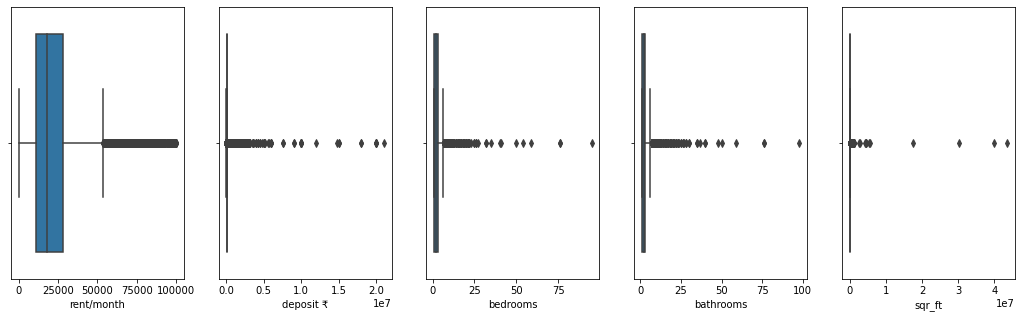

In [101]:
# Boxplots for finding the outliers
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
sns.boxplot(data=nd, x='rent/month', ax=axes[0])
sns.boxplot(data=nd, x='deposit ₹', ax=axes[1])
sns.boxplot(data=nd, x='bedrooms', ax=axes[2])
sns.boxplot(data=nd, x='bathrooms', ax=axes[3])
sns.boxplot(data=nd, x='sqr_ft', ax=axes[4])

In [102]:
! pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable


- We are removing outliers by istalling winsorizer and capping "iqr" in the place of outliers

In [103]:
from feature_engine.outliers import Winsorizer

In [104]:
ss = Winsorizer(capping_method ='iqr',tail="both",variables="rent/month",fold=1.5)
nd["rent/month"]=ss.fit_transform(nd[["rent/month"]])
ss = Winsorizer(capping_method ='iqr',tail="both",variables="deposit ₹",fold=1.5)
nd["deposit ₹"]=ss.fit_transform(nd[["deposit ₹"]])
ss = Winsorizer(capping_method ='iqr',tail="both",variables="bedrooms",fold=1.5)
nd["bedrooms"]=ss.fit_transform(nd[["bedrooms"]])
ss = Winsorizer(capping_method ='iqr',tail="both",variables="bathrooms",fold=1.5)
nd["bathrooms"]=ss.fit_transform(nd[["bathrooms"]])
ss = Winsorizer(capping_method ='iqr',tail="both",variables="sqr_ft",fold=1.5)
nd["sqr_ft"]=ss.fit_transform(nd[["sqr_ft"]])

- Plotting Boxplots after removing outliers using winsorizer 

<AxesSubplot:xlabel='sqr_ft'>

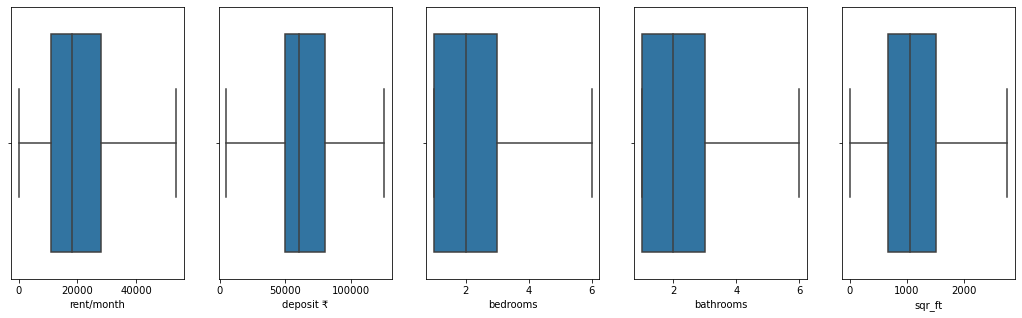

In [105]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
sns.boxplot(data=nd, x='rent/month', ax=axes[0])
sns.boxplot(data=nd, x='deposit ₹', ax=axes[1])
sns.boxplot(data=nd, x='bedrooms', ax=axes[2])
sns.boxplot(data=nd, x='bathrooms', ax=axes[3])
sns.boxplot(data=nd, x='sqr_ft', ax=axes[4])

<center><h1 style="color:red">Univariate Analysis</h1>

- Univariate analysis is done on a single variable for analyzing data

<center><h1 style="color:blue">city</h1>

<AxesSubplot:title={'center':'No of houses for rents in the cities'}, xlabel='cities', ylabel='No of houses for rents'>

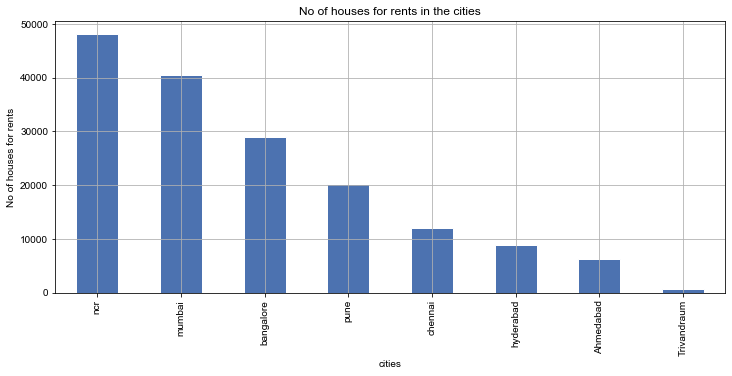

In [106]:
# Creating the bar plot
plt.figure(figsize = (12, 5))
plt.xlabel("cities")
plt.ylabel("No of houses for rents")
plt.title("No of houses for rents in the cities")
sns.set(font_scale=1)
nd['city'].value_counts().head(10).plot.bar()

## As observing the barplot we came to know that:
- The city ncr(national capital delhi) has more no of houses for rent
- Whereas mubai stands second
- Trivandaram has less no of houses for rents

<center><h1 style="color:green">rent/month</h1>

<AxesSubplot:title={'center':'Which amount of rent is high per month'}, xlabel='rent/month', ylabel='no of houses'>

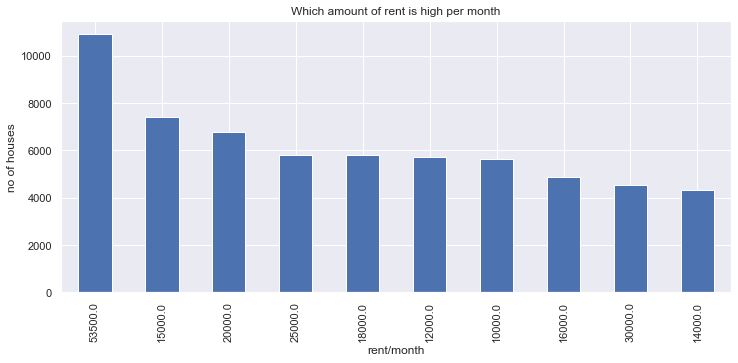

In [107]:
plt.figure(figsize = (12, 5))
plt.xlabel("rent/month")
plt.ylabel("no of houses")
plt.title("Which amount of rent is high per month")
sns.set(font_scale=1)
nd['rent/month'].value_counts().head(10).plot.bar()

## On observing the barplot we came to know that:
- More than ten thousand individual or rented houses have 53500 rupees of rents per month
- More then six thousand houses have 15000 rupees of rent per month

<center><h1 style="color:black">deposit ₹</h1>

<AxesSubplot:title={'center':'which amount of deposit is high'}, xlabel='deposit ₹', ylabel='No of houses for rents'>

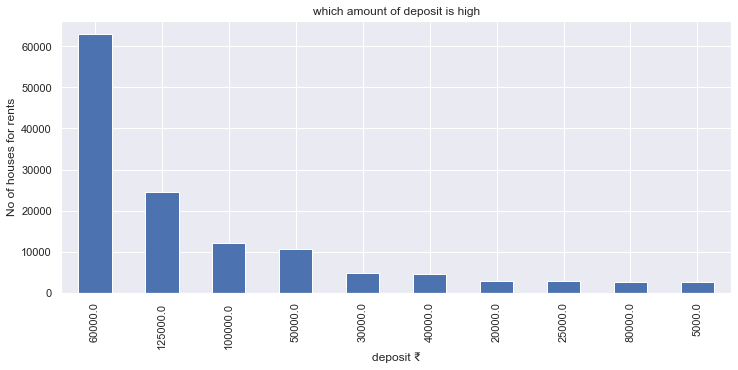

In [108]:
plt.figure(figsize = (12, 5))
plt.xlabel("deposit ₹")
plt.ylabel("No of houses for rents")
plt.title("which amount of deposit is high")
sns.set(font_scale=1)
nd['deposit ₹'].value_counts().head(10).plot.bar()

## on observing the bar plot we came to know that:
- more than 60000 oeners are demanding ₹ 60000 as deposit
- very few of them are asking ₹5000 as deposit

<center><h1 style="color:brown">bedrooms</h1>

<AxesSubplot:title={'center':'houses with how many bedrooms have demand'}, xlabel='no of bedrooms', ylabel='No of houses for rents'>

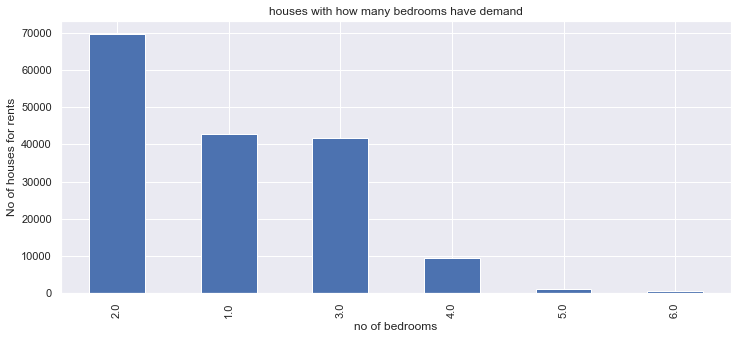

In [109]:
plt.figure(figsize = (12, 5))
plt.xlabel("no of bedrooms")
plt.ylabel("No of houses for rents")
plt.title("houses with how many bedrooms have demand")
sns.set(font_scale=1)
nd['bedrooms'].value_counts().head(10).plot.bar()

## on observing the barplot we came to know that:
- as per the graph we came to know that 70000 houses with 2 bedrooms are choosen by tenents
 so 2 bedroom flats have more demand
- 40000 tenents are looking for 3 bedrooms 

<center><h1 style="color:violet">bathrooms</h1>

<AxesSubplot:title={'center':'houses with how many bathrooms have demand'}, xlabel='no of bathrooms', ylabel='No of houses for rents'>

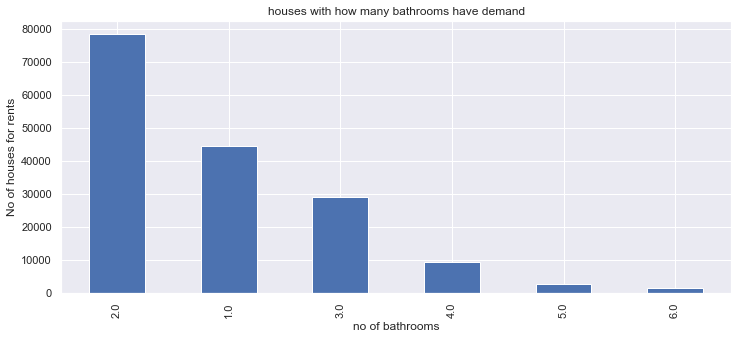

In [110]:
plt.figure(figsize = (12, 5))
plt.xlabel("no of bathrooms")
plt.ylabel("No of houses for rents")
plt.title("houses with how many bathrooms have demand")
sns.set(font_scale=1)
nd['bathrooms'].value_counts().head(10).plot.bar()

## on observing the barplot we came to know that:
- more than 70000 houses with 2 bathrooms are choosen by tenents
- single bathroom stands next with 2 bathrooms with more than 40000

<center><h1 style="color:skyblue">sqr_ft</h1>

<AxesSubplot:title={'center':'houses with how many sqr_ft have demand'}, xlabel='sqr_ft', ylabel='No of houses for rents'>

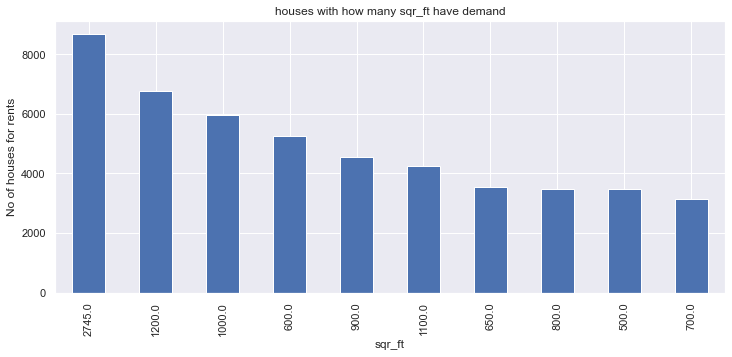

In [111]:
plt.figure(figsize = (12, 5))
plt.xlabel("sqr_ft")
plt.ylabel("No of houses for rents")
plt.title("houses with how many sqr_ft have demand")
sns.set(font_scale=1)
nd['sqr_ft'].value_counts().head(10).plot.bar()

## on observing the barplot we came to know that:
- More than 8000 houses with 2745 sq_fts are choosen by tenants
- more than 6000 houses with 1200 sq_fts are choosen by tenants

In [112]:
nd.columns

Index(['city', 'rent/month', 'deposit ₹', 'bedrooms', 'bathrooms', 'sqr_ft',
       'area', 'description'],
      dtype='object')

<center><h1 style="color:red">Bivariate Analysis</h1>
    

# Biavariate Analysis is done on two varibles
- Here the terget variable is rent so we need to do bivariate analysis with this variable

<center><h1 style="color:green">city & rent/month</h1>
    

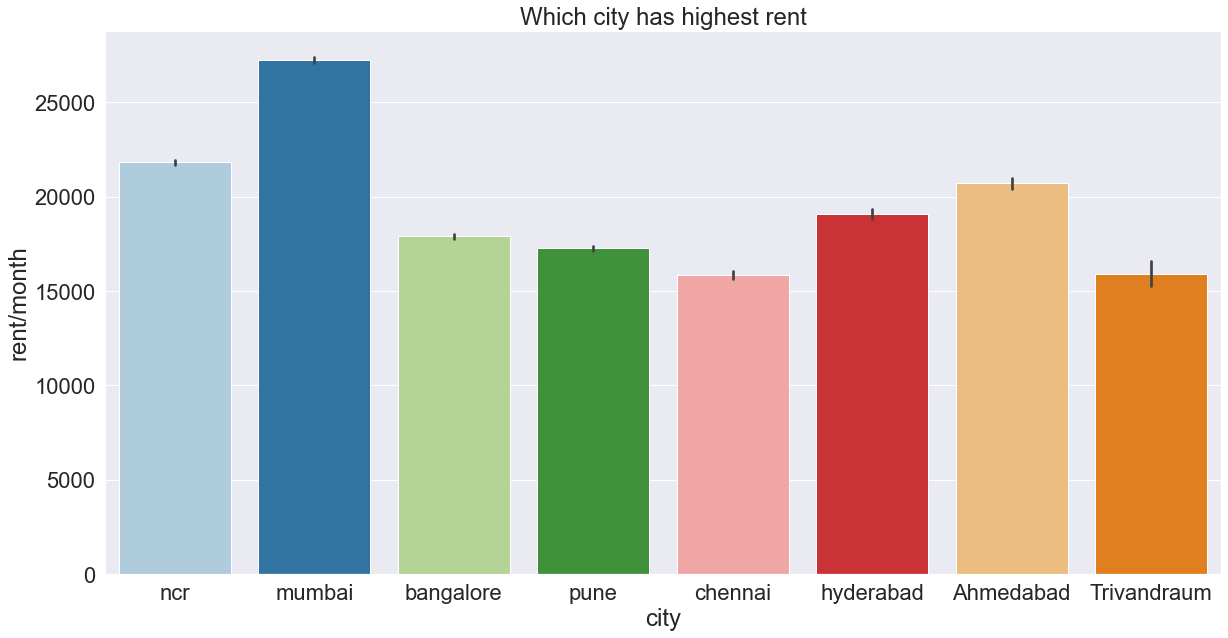

In [113]:
plt.figure(figsize = (20, 10))

sns.set(style = "darkgrid")
sns.set(font_scale=2),
ax = sns.barplot( x="city", y="rent/month", data = nd,
              order = nd['city'].value_counts().head(10).index,palette="Paired",)

plt.title('Which city has highest rent')
plt.show()

# according to the graph:
- mumbai has highest rent/month with 27000 rupees
- ncr stands second with 22000 rupees rent/month

<center><h1 style="color:green"> deposit ₹ & rent/month</h1>

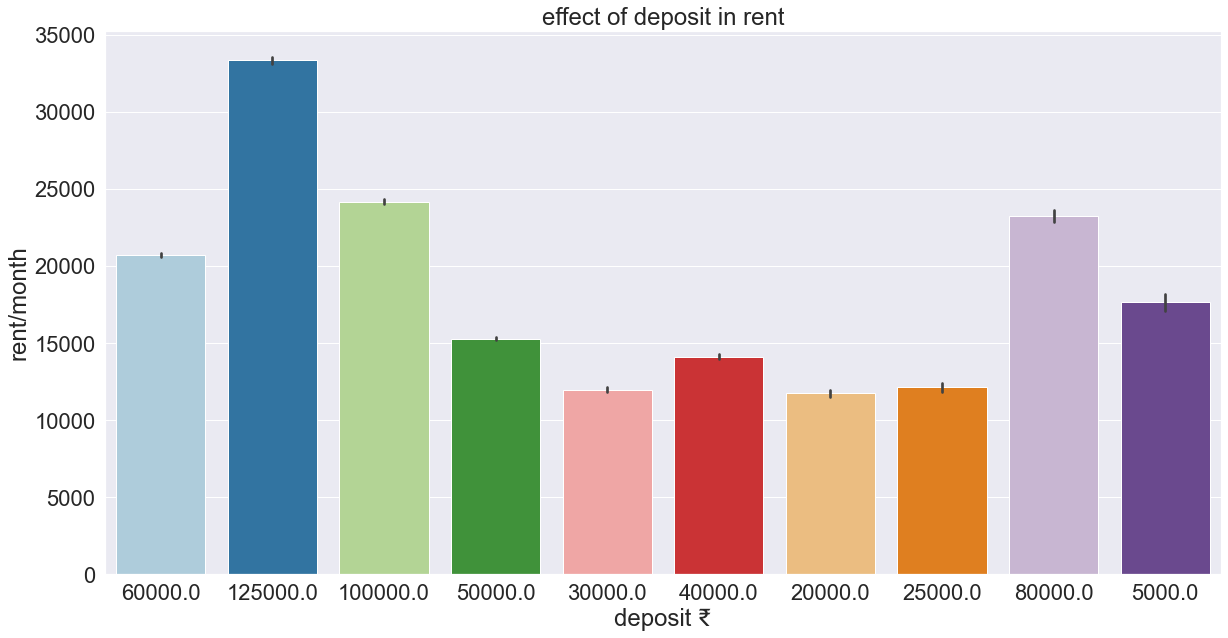

In [114]:
plt.figure(figsize = (20, 10))

sns.set(style = "darkgrid")
sns.set(font_scale=2),
ax = sns.barplot( x="deposit ₹", y="rent/month", data = nd,
              order = nd['deposit ₹'].value_counts().head(10).index,palette="Paired",)

plt.title('effect of deposit in rent')
plt.show()

# according to graph:
- deposit of ₹ 125000 has a rent of ₹33000 
- deposit of ₹80000 has a ret of ₹23000
## As the deposit is high the rent will also be high in India

<center><h1 style="color:green"> bedrooms & rent/month</h1>

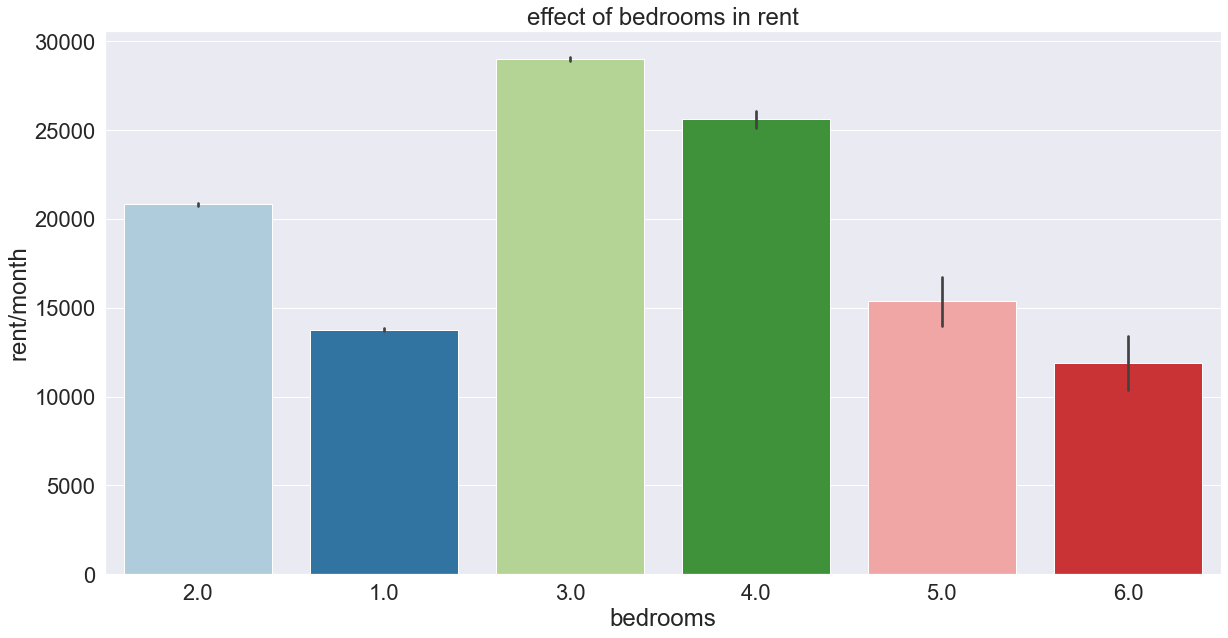

In [115]:
plt.figure(figsize = (20, 10))

sns.set(style = "darkgrid")
sns.set(font_scale=2),
ax = sns.barplot( x="bedrooms", y="rent/month", data = nd,
              order = nd['bedrooms'].value_counts().head(10).index,palette="Paired",)

plt.title('effect of bedrooms in rent')
plt.show()

# according to the graph:
- 3 bedroom flats have 28000 rupees rent
- 4 bedroom  flats have 25500 rupees rent
## 3 bedroom flats have more rent

<center><h1 style="color:green"> bathrooms & rent/month</h1>

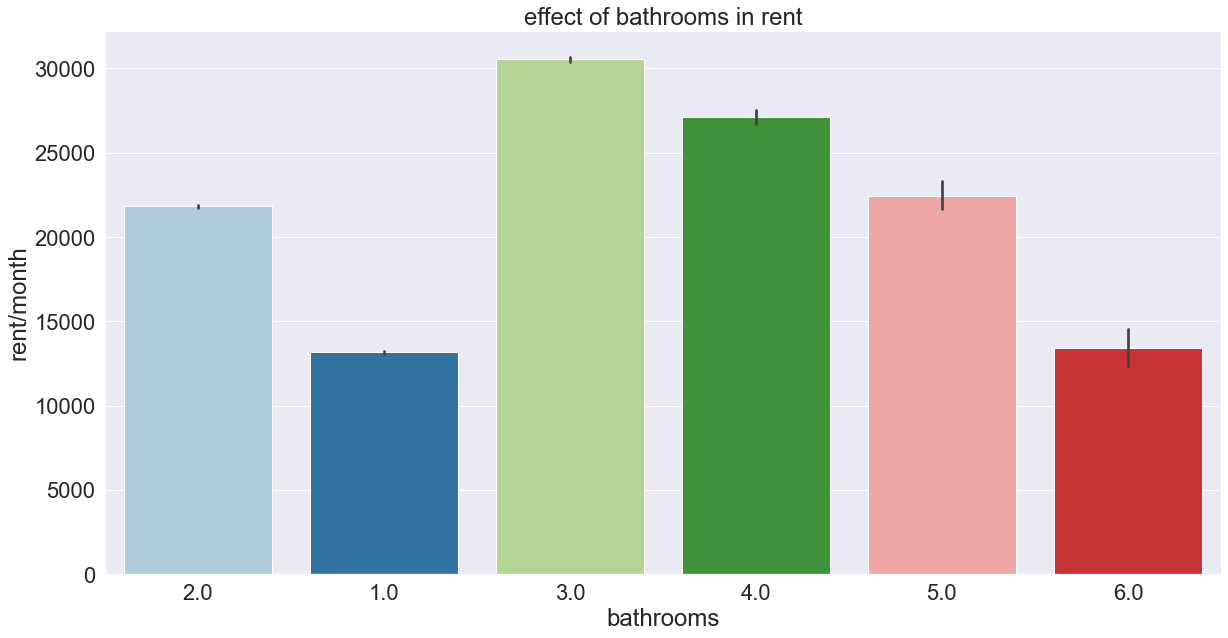

In [116]:
plt.figure(figsize = (20, 10))

sns.set(style = "darkgrid")
sns.set(font_scale=2),
ax = sns.barplot( x="bathrooms", y="rent/month", data = nd,
              order = nd['bathrooms'].value_counts().head(10).index,palette="Paired",)

plt.title('effect of bathrooms in rent')
plt.show()

# according to the graph:
- 3 bathroom flats having a rent of 31000
- 4 bathroom flats having a rent of 26000
## 3 bathroom flats have high rents in india

<center><h1 style="color:green"> sqr_ft & rent/month</h1>

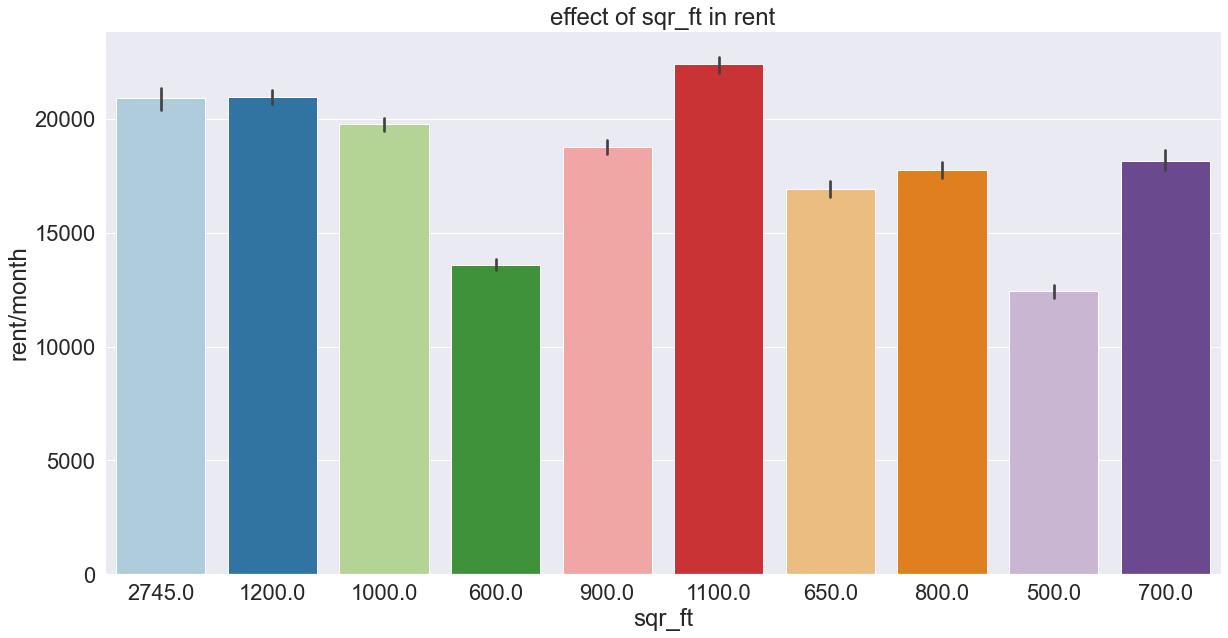

In [117]:
plt.figure(figsize = (20, 10))

sns.set(style = "darkgrid")
sns.set(font_scale=2),
ax = sns.barplot( x="sqr_ft", y="rent/month", data = nd,
              order = nd['sqr_ft'].value_counts().head(10).index,palette="Paired",)

plt.title('effect of sqr_ft in rent')
plt.show()

# according to the graph:
- 1100 sq_ft houses are having a rent of 24000 
- 2745 and 1200 sq_ft houses are having a rent of 21000
## houses with 1100 sq_ft have high rent


<center><h1 style="color:brown">Multivariate Analysis</h1>

## Multivariate Analysis is done on multiple variabled to find the correlation b/w them

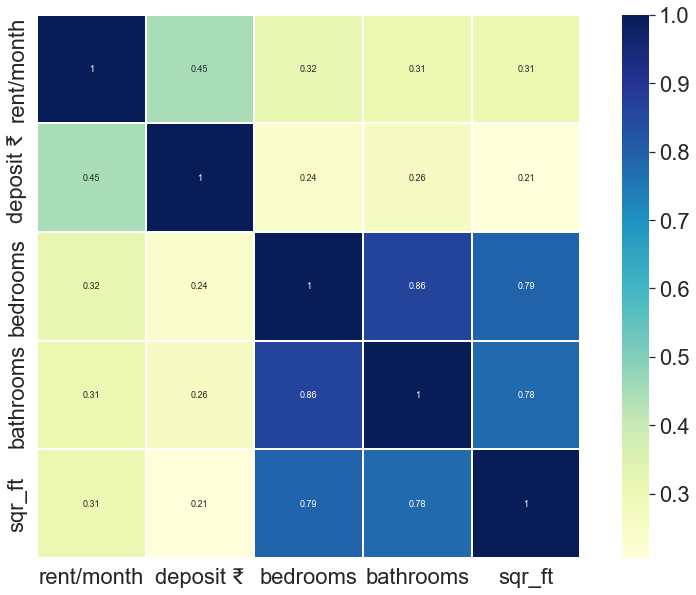

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(nd.corr(), vmin=nd.corr().values.min(), vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":9})
plt.show()

<center><h1 style="color:r">Data Preprocessing</h1>

In [119]:
from sklearn.preprocessing import LabelEncoder

for column in nd.columns:
    if nd[column].dtype=='int64' and  nd[column].dtype=='float64':
        continue
    else:
        nd[column]=LabelEncoder().fit_transform(nd[column])

In [120]:
nd

,city,rent/month,deposit ₹,bedrooms,bathrooms,sqr_ft,area,description
0,5,835,737,0,1,398,5139,2
1,5,1865,902,2,2,1721,9438,2
2,5,1865,902,1,1,876,12180,2
3,5,1851,902,2,2,1226,3841,2
4,5,1377,902,0,0,477,4734,2
...,...,...,...,...,...,...,...,...
165416,1,470,304,1,2,1126,723,1
165417,1,1015,580,1,1,1081,4912,2
165418,1,470,368,1,1,787,11832,2
165419,1,1459,902,3,4,2469,7822,5


##  Model Selection:
- We are selecting regression model because the target variable rent consists of numerical data. So we need to use regression model for numerical data


# Evalution Matrix:
- evalution matrix helps us to give the better optimisation of model and obatain a better result from it
- evalution matrics means how many times our model predicted wrong

# various evalution metrics for regression are:

## Mean Absolute Error:
- It is used for caluculating the absolute difference between actual and predicted values
- suam of all the errors/total number of observations

## Mean Squared Error:
- MSE is similar to mean absolute error with little changes to it.
- it states the squared difference between actual and predicted value

## R Squared Error:
- R squared error tells usthaat how many tny times our model predicted right.
- if R square score  is between 0 and 1 which means your model is capable of explining 80 percent of variance of data.

<center><h1 style="color:blue"> Linear Regression</h1>

In [121]:
x= nd.drop("rent/month",axis=1)
x

,city,deposit ₹,bedrooms,bathrooms,sqr_ft,area,description
0,5,737,0,1,398,5139,2
1,5,902,2,2,1721,9438,2
2,5,902,1,1,876,12180,2
3,5,902,2,2,1226,3841,2
4,5,902,0,0,477,4734,2
...,...,...,...,...,...,...,...
165416,1,304,1,2,1126,723,1
165417,1,580,1,1,1081,4912,2
165418,1,368,1,1,787,11832,2
165419,1,902,3,4,2469,7822,5


In [122]:
y= nd["rent/month"]
y

0          835
1         1865
2         1865
3         1851
4         1377
          ... 
165416     470
165417    1015
165418     470
165419    1459
165420     381
Name: rent/month, Length: 165421, dtype: int64

<center><h1 style="color:brown">Linear Regression</h1>

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32,test_size=0.3)

In [125]:
x_train.shape,y_train.shape

((115794, 7), (115794,))

In [126]:
x_test.shape

(49627, 7)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
model = LinearRegression()

In [129]:
model.fit(x_train,y_train)

LinearRegression()

In [130]:
model_pred= model.predict(x_test)
model_pred

array([1109.20030968,  569.9649219 , 1147.3291185 , ...,  272.24191189,
        909.56507326,  633.57615353])

In [131]:
model.score(x_train,y_train)

0.2495086026012987

In [132]:
model.score(x_test,y_test)

0.2516060570057761

In [133]:
y_test

76661      717
91429      424
119231    1336
145544    1814
49335      606
          ... 
146521     972
71102      424
73961      484
139782     759
22924      343
Name: rent/month, Length: 49627, dtype: int64

In [134]:
def adj_r2(x, y, model):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [135]:
print(adj_r2(x_train, y_train, model))

0.24946323062384212


In [136]:
print(adj_r2(x_test, y_test, model))

0.25150047733667835


<center><h1 style="color=orange"> Lasso Regression<h1/>

In [137]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [138]:
alpha = lasso_cv.alpha_
alpha

0.0006198371264085332

In [139]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0006198371264085332)

In [140]:
lasso.score(x_train, y_train)

0.24950860257548546

In [141]:
lasso.score(x_test, y_test)

0.2516060581694338

In [142]:
print(adj_r2(x_train, y_train, lasso))

0.24946323059802733


In [143]:
print(adj_r2(x_test, y_test, lasso))

0.2515004785005003


<center><h1 style="color=red"> Ridge Regression</h1>

In [144]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(x_train, y_train)


RidgeCV(alphas=array([6.26703822, 5.61480872, 6.7702633 , 6.94392331, 1.07892606,
       5.49383297, 7.93723173, 1.2350454 , 2.88924692, 6.64632638,
       7.20318929, 6.47391619, 2.59353278, 1.49657829, 3.90731098,
       5.50654757, 3.75192596, 9.80681   , 3.92021718, 4.15208945,
       3.41890364, 8.56620638, 7.60913257, 2.10625357, 1.88054604,
       3.71117223, 0.61141676, 3.72862224, 2.22949799, 7.42325354,
       4.29122167, 8.21361813, 9.00526846, 1.20291467, 2.10104122,
       7.66717256, 4.53415436, 9.83815614, 7.44401025, 2.05074922,
       1.0369292 , 8.73187865, 2.00133419, 6.51173272, 3.92002891,
       7.15962288, 0.32622346, 0.02641003, 3.95496342, 0.9503661 ]),
        cv=10, normalize=True)

In [145]:
alpha = ridge_cv.alpha_
alpha

0.026410034986087405

In [146]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train, y_train)

Ridge(alpha=0.026410034986087405)

In [147]:

ridge.score(x_train, y_train)

0.24950860260128793

In [148]:
ridge.score(x_test, y_test)

0.2516060570850669

In [149]:
print(adj_r2(x_train, y_train, ridge))

0.24946323062383124


In [150]:
print(adj_r2(x_test, y_test, ridge))

0.25150047741598036


<center><h1 style="color=red">Elastic Net Regression</h1>

In [151]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [152]:
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_net_cv.fit(x_train, y_train)
ElasticNetCV(cv=10, max_iter=100000, normalize=True)
alpha = elastic_net_cv.alpha_
alpha

0.0012396742528170666

In [153]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(x_train, y_train)
ElasticNet(alpha=0.0012633825099956759)
elastic_net.score(x_train, y_train)

0.24950852222313413

In [154]:
elastic_net.score(x_test, y_test)

0.25160619383267147

In [155]:
print(adj_r2(x_train, y_train, elastic_net))

0.2494631502408181


In [156]:
print(adj_r2(x_test, y_test, elastic_net))

0.2515006141828765


<center><h1 style="color:brown">Decision Tree Regression</h1>

In [157]:
from sklearn.tree import DecisionTreeRegressor


In [158]:
model = DecisionTreeRegressor(random_state = 0)

In [159]:
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [160]:
DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [161]:
y_pred = model.predict(x_test)

In [162]:
y_pred

array([ 551. ,  652. , 1313. , ...,  484. ,  324.5,  343. ])

In [163]:
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:",rmse)


RMSE: 368.688


In [164]:
model.score(x_train, y_train)

0.9537411106666487

In [165]:
model.score(x_test, y_test)

0.4857957164836426

<center><h1 style="color:brown">Random Forest Regression</h1>

In [166]:

from sklearn.ensemble import RandomForestRegressor

In [167]:
rfg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [168]:
rfg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [169]:
RandomForestRegressor(n_estimators=10, random_state=0)

RandomForestRegressor(n_estimators=10, random_state=0)

In [170]:
y_pred =rfg.predict(x_test)

In [171]:
rfg.score(x_train, y_train)

0.9060740909884588

In [172]:
rfg.score(x_test, y_test)

0.6466058314231427

<center><h1 style="color:brown">Super Vector Machine(SVM)</h1>

In [173]:
from sklearn.svm import LinearSVR

In [174]:
from sklearn.metrics import mean_absolute_error

In [175]:
svm_model = LinearSVR()

In [176]:
svm_model.fit(x_train, y_train)

LinearSVR()

In [177]:
predicted_svm = svm_model.predict(x_test)

In [178]:
svm_model.score(x_train, y_train)

0.06875327616754356

In [179]:
svm_model.score(x_test, y_test)

0.06704143491368453

In [180]:
print("Mean Absolute Error using SVM:", mean_absolute_error(y_test, predicted_svm))

Mean Absolute Error using SVM: 378.01121108621834


<center><h1 style="color:brown">KNN Regression</h1>

In [181]:

from sklearn.neighbors import KNeighborsRegressor

In [182]:
knn_model = KNeighborsRegressor()

In [183]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [184]:
predicted_knn = knn_model.predict(x_test)

In [185]:
print("Mean Absolute Error using KNN Regression:", mean_absolute_error(y_test, predicted_knn))

Mean Absolute Error using KNN Regression: 242.23822112962705


In [186]:
knn_model.score(x_train, y_train)

0.6560530877055153

In [187]:
knn_model.score(x_test, y_test)

0.4749981240874782

## conclusion:

 project aim: our main aim of the project is to predict the house rent based on "ATTRIBUTES" like ... city,deposit ₹,bedrooms,bathrooms,sqr_ft,area. 

By applying above regression models,we came to know that 'RANDOM FOREST' has good score(0.64) in prediction.